# 1장 파이썬 기초
## Numpy 기초

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([1.0, 2.0, 3.0])
print(x)

[1. 2. 3.]


In [3]:
type(x) # 특수 형태의 배열

numpy.ndarray

In [4]:
y = np.array([2.0, 4.0, 6.0])
print(x + y)
print(x - y)
print(y / x)

[3. 6. 9.]
[-1. -2. -3.]
[2. 2. 2.]


In [5]:
A = np.array([[1,2], [3,4]]) # 2차원 배열
print(A)

[[1 2]
 [3 4]]


## 브로드캐스트
### 가령 2 X 2 행렬에 스칼라값 10을 곱할 경우 모든 행렬 원소에 곱해지는 것을 의미(행렬 곱)

In [6]:
A = np.array([[1,2], [3,4]])
B = np.array([10, 20])
print(A * B)

[[10 40]
 [30 80]]


In [7]:
x = np.array([[5, 8], [7, 2], [1, 9]])
print(x)
x = x.flatten() # 1차원 배열로 변환
print(x)
x[np.array([0,2,4])] # 인덱스 0, 2, 4인 원소 읽기

[[5 8]
 [7 2]
 [1 9]]
[5 8 7 2 1 9]


array([5, 7, 1])

In [8]:
x > 5

array([False,  True,  True, False, False,  True])

In [9]:
x[x>5]

array([8, 7, 9])

## Matplotlib 기초

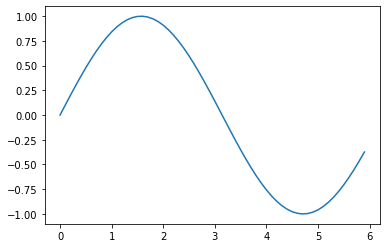

In [10]:
x = np.arange(0, 6, 0.1)
y = np.sin(x)
plt.plot(x,y)
plt.show()

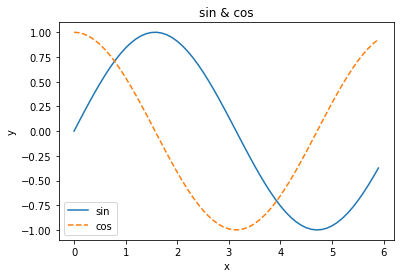

In [11]:
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x, y1, label = "sin")
plt.plot(x, y2, label = "cos", linestyle = '--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('sin & cos')
plt.legend()
plt.show()


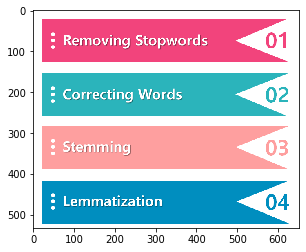

In [12]:
img = plt.imread('image_index.PNG')
plt.imshow(img)
plt.show()

# 2장 퍼셉트론
## 퍼셉트론(perceptron)은 1957년 고안된 알고리즘, 신경망(딥러닝)의 기원이 되는 알고리즘이다.
## - 다수의 신호를 입력으로 받아 하나의 신호로 출력하는 것을 의미
## - 1(신호 有), 0(신호 無)의 2가지 값만 가진다.

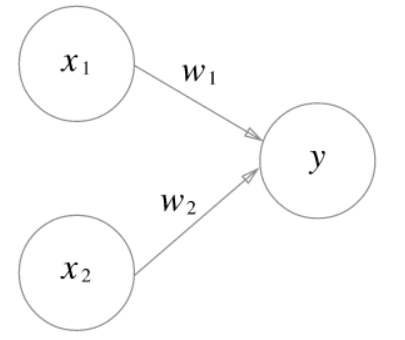

In [14]:
from IPython.display import Image
Image(filename = 'Deep Learning from Scratch_img1.PNG')

## 입력으로 2개의 신호를 받은 퍼셉트론의 예시다.
## x1, x2는 입력신호, y는 출력신호, w1, w2는 가중치를 뜻한다.
## 그림의 원을 뉴런 혹은 노드라고 부른다.
## 입력 신호가 뉴런에 보내질 때, 각각 고유한 가중치가 곱해진다.
## 뉴런에서 보낸 신호의 총합이 정해진 한계를 넘어설 때만 1을 출력하며, 뉴런이 활성화한다고 말한다. (임계값 theta를 넘었다고도 말한다.)


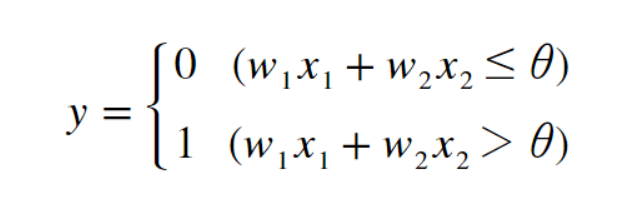

In [15]:
from IPython.display import Image
Image(filename = 'Deep Learning from Scratch_img2.PNG')

## 논리회로
## AND, OR, NAND 등의 논리회로는 입력이 2개, 출력이 1개이다.

In [16]:
def AND(x1, x2): # w1, w2는 함수 안에서 초기화하고, 가중치를 곱한 입력의 총합이 임계값을 넘으면 1을 반환
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    if tmp > theta:
        return 1
print(AND(0,0))
print(AND(0,1))
print(AND(1,0))
print(AND(1,1))

0
0
0
1


## theta를 -b로 치환, b는 편향(bias)이라 정의
## 즉, 퍼셉트론은 입력 신호에 가중치를 곱한 값과 편향을 합하여, 그 값이 0을 넘으면 1, 그렇지 않으면 0을 출력한다.

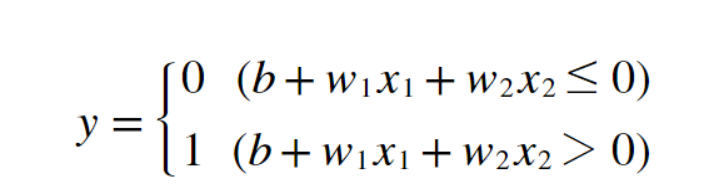

In [17]:
from IPython.display import Image
Image(filename = 'Deep Learning from Scratch_img3.PNG')

In [18]:
x = np.array([0, 1])
w = np.array([0.5, 0.5])
b = -0.7
print(w * x)
print(np.sum(w * x))
np.sum(w*x) + b

[0.  0.5]
0.5


-0.19999999999999996

## 가중치와 편향을 도입한 AND 게이트 재구성

In [19]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = - 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

## w1, w2는 각 입력 신호가 결과에 주는 영향력(중요도)을 조절하는 매개변수, 편향 b는 뉴런이 얼마나 쉽게 활성화(결과로 1을 출력)하느냐를 조정하는 매개변수이다.

In [20]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [21]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

## 3개의 차이는 가중치 매개변수가 다른 것일 뿐이다.
## 여기서 퍼셉트론의 매개변수 값을 정하는 것은 컴퓨터가 아니라 사용자다. 사용자가 직접 진리표라는 '학습 데이터'를 보면서 매개변수의 값을 생각하며, 기계학습 문제는 이 매개변수의 값을 정하는 작업을 컴퓨터가 자동으로 하도록 한다.

## 퍼셉트론의 한계
## → 직선 하나로 나눈 영역만 표시할 수 있는데, XOR 같은 논리 게이트는 선형으로 해결할 수 없고, 비선형 영역으로 해결해야 한다. 
## → 단층 퍼셉트론으로는 비선형 영역을 분리할 수 없고, 퍼셉트론을 조합한 다층 구조로 해결해야 한다.

In [24]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

print(XOR(0, 0))
print(XOR(0, 1))
print(XOR(1, 0))
print(XOR(1, 1))

0
1
1
0


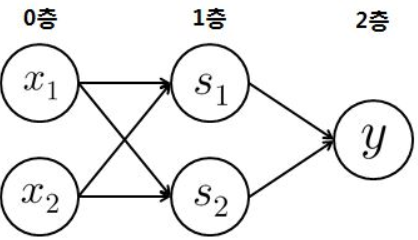

In [25]:
from IPython.display import Image
Image(filename = 'Deep Learning from Scratch_img4.PNG')

## AND, OR은 단층 퍼셉트론인 데 반해, XOR은 2층 퍼셉트론(=다층 퍼셉트론)이다.
## 이론상 2층 퍼셉트론으로 컴퓨터를 만들 수 있다. 비선형 함수인 시그모이드 함수를 활성화 함수로 이용하면 임의의 함수를 표현할 수 있다는 사실이 증명되었다. 
## AND, OR → 반가산기, 전가산기 → ALU → CPU 순서

# 퍼셉트론 정리
## 1. 퍼셉트론은 입출력을 가진 알고리즘이다. 입력을 주면 규칙에 따른 값을 출력한다.
## 2. 퍼셉트론에서는 가중치와 편향을 매개변수로 설정한다.
## 3. 단층 퍼셉트론은 직선형 영역만 표시할 수 있고, 다층 퍼셉트론은 비선형 영역도 표현할 수 있다.